# Import Libraries

In [1]:
import pandas as pd #data manipulation
import numpy as np #data transformation
from scipy import stats #stat tests

#visuals
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import and make copy
data = pd.read_csv('data/train.csv')
copy = data.copy()

copy.sample(5)

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
224442,224442,6,2,2,8,5,1,5,3,6,...,3,6,3,4,6,9,4,3,3,0.430
349413,349413,3,7,6,4,4,4,6,9,2,...,6,6,8,7,3,9,7,3,5,0.595
589618,589618,7,2,3,4,7,2,11,10,5,...,10,3,7,5,2,6,2,5,5,0.570
144182,144182,5,8,4,4,6,8,2,4,3,...,10,4,2,8,4,1,6,7,4,0.515
866845,866845,1,5,3,4,5,0,4,8,8,...,3,8,3,6,8,4,2,4,3,0.410


# Data Overview

In [3]:
#check for nulls
copy.isna().sum()

id                                 0
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

In [6]:
#check for dups
copy.duplicated().sum()

0

In [7]:
#features, dytpes
copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

Summary:
- no nulls or duplicates
- all dtypes are ints except target

Questions:
- are values ordinal? Will assume so for now

# Exploratory data analysis

In [3]:
#drop id
copy = copy.drop('id', axis=1)
#decribe df
copy.describe()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,...,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,4.949230e+00,...,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,2.083324e+00,...,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,...,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.800000e+01,...,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


## Data Distribution

In [3]:
# functions for histograms
def plot_histograms(dataframe, features, num_rows, num_cols, fig_size):
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=fig_size)
    for i in range(num_rows):
        for j in range(num_cols):
            idx = i * num_cols + j
            feature = features[idx]
            axs[i, j].hist(dataframe[feature])
            axs[i, j].set_title(feature)
    plt.suptitle('Histograms')
    plt.show()


#function for boxplots
def plot_boxplots(dataframe, features, num_rows, num_cols, fig_size):
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=fig_size)
    for i in range(num_rows):
        for j in range(num_cols):
            idx = i * num_cols + j
            feature = features[idx]
            axs[i, j].boxplot(dataframe[feature])
            axs[i, j].set_title(feature)
    plt.suptitle('Boxplots')
    plt.show()


#functions for qq plots
def make_qq(dataframe, features, num_rows, num_cols, fig_size):
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=fig_size)
    for i in range(num_rows):
        for j in range(num_cols):
            idx = i * num_cols + j
            feature = features[idx]
            qqplot(dataframe[feature], line='q', ax=axs[i, j])
            axs[i, j].set_title(feature)
    plt.suptitle('QQ Plots')
    plt.show()


#function for normality tests
def jarque_bera(dataframe, features):
    for feature in features:
        test_stat, p_value = stats.jarque_bera(dataframe[feature])
        print(f"{feature}:\n    Test stat: {test_stat}\n    p_value: {p_value}")

def shapiro(dataframe, features):
    for feature in features:
        test_stat, p_value = stats.shapiro(dataframe[feature])
        print(f"{feature}:\n    Test stat: {test_stat}\n    p_value: {p_value}")

def daugstino(dataframe, features):
    for feature in features:
        test_stat, p_value = stats.normaltest(dataframe[feature])
        print(f"{feature}:\n    Test stat: {test_stat}\n    p_value: {p_value}")
        

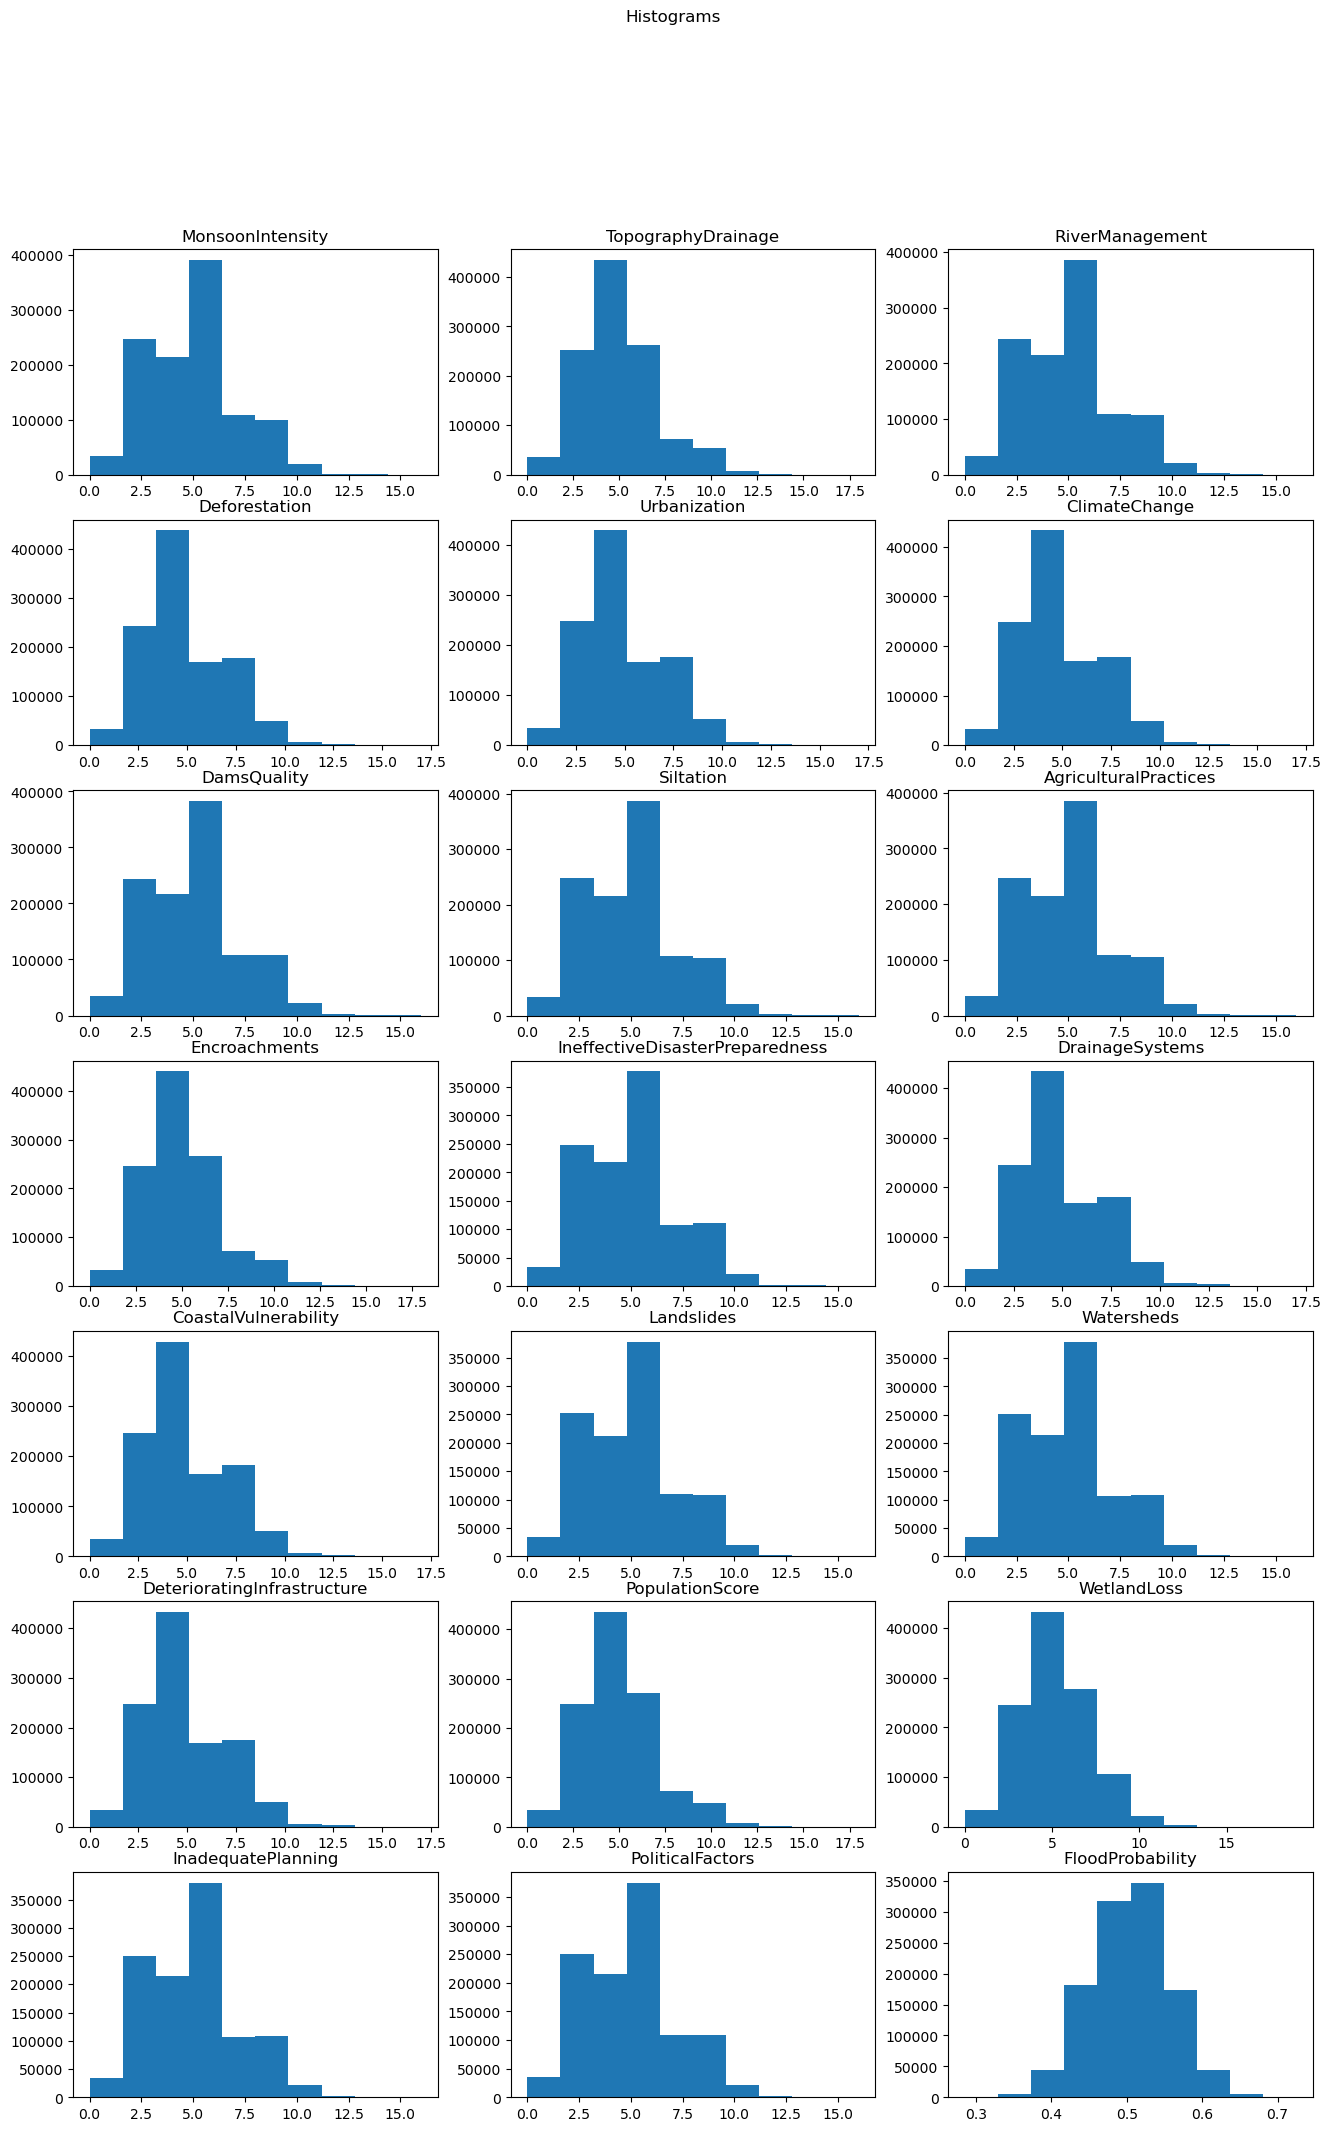

In [5]:
my_features = list(copy.columns)
#histograms
plot_histograms(copy, my_features, 7, 3, (16, 24))

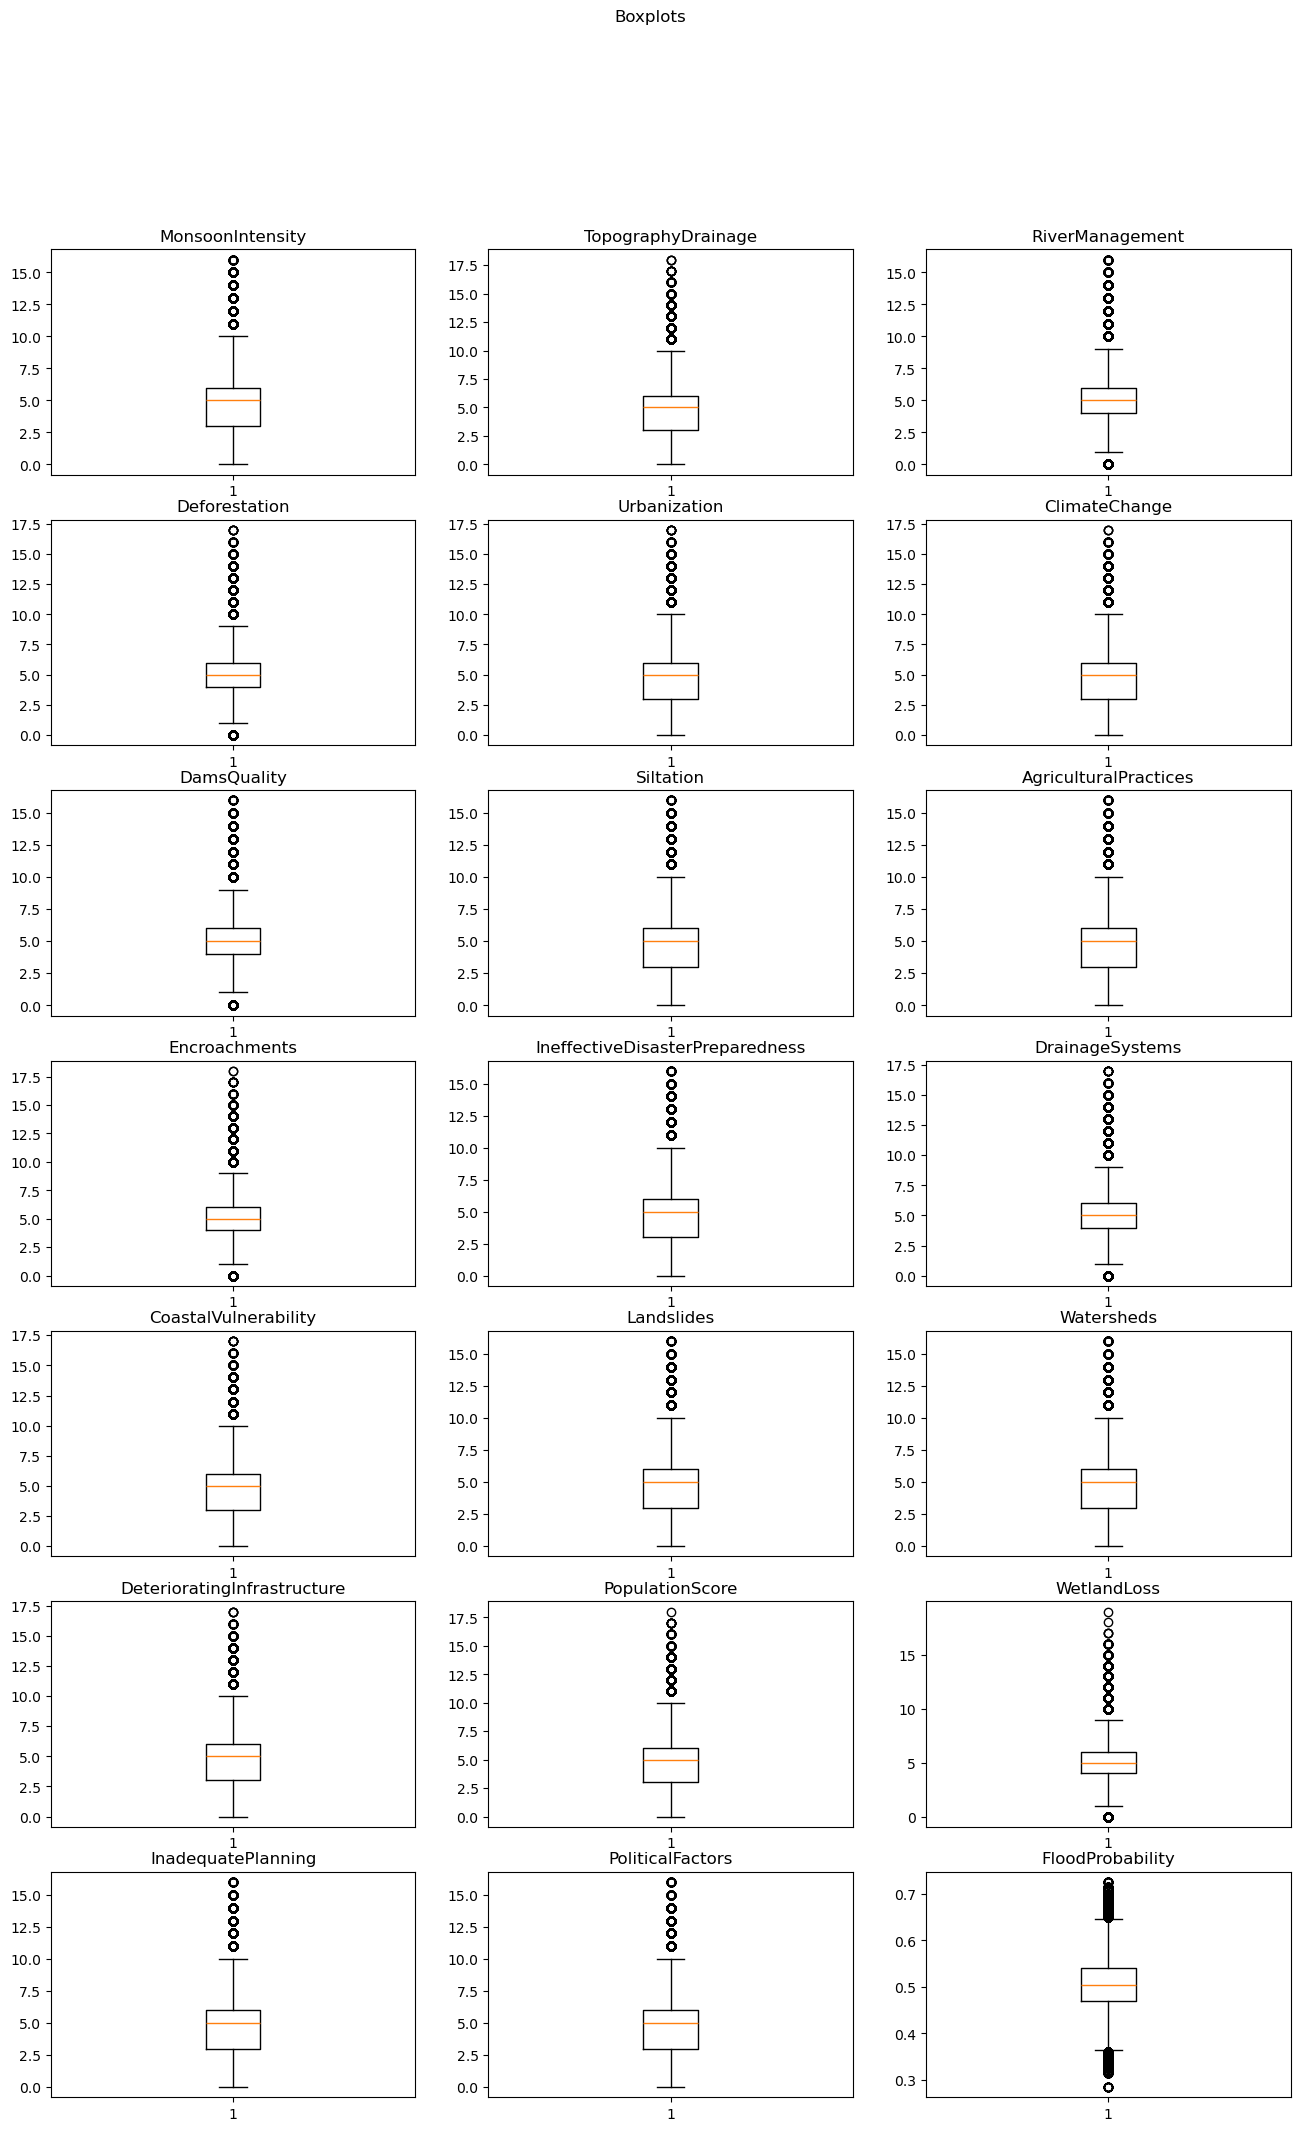

In [14]:
plot_boxplots(copy, copy.columns, 7, 3, (16, 24))

I don't think the outliers matter here as the data is ordinal. At the same time I might need to bin the data points to make it more manageable. lots of features too...

In [16]:
#test if data comes from normal distribution
jarque_bera(copy, copy.columns)

MonsoonIntensity:
    Test stat: 42242.567548020415
    p_value: 0.0
TopographyDrainage:
    Test stat: 41855.031048256344
    p_value: 0.0
RiverManagement:
    Test stat: 36232.300023053685
    p_value: 0.0
Deforestation:
    Test stat: 38671.75120033881
    p_value: 0.0
Urbanization:
    Test stat: 39300.21568089843
    p_value: 0.0
ClimateChange:
    Test stat: 37067.35494672611
    p_value: 0.0
DamsQuality:
    Test stat: 39502.1728251271
    p_value: 0.0
Siltation:
    Test stat: 41444.31979738303
    p_value: 0.0
AgriculturalPractices:
    Test stat: 35182.272750346245
    p_value: 0.0
Encroachments:
    Test stat: 43348.168823529944
    p_value: 0.0
IneffectiveDisasterPreparedness:
    Test stat: 38647.4179648571
    p_value: 0.0
DrainageSystems:
    Test stat: 40338.44174368026
    p_value: 0.0
CoastalVulnerability:
    Test stat: 38720.39709303771
    p_value: 0.0
Landslides:
    Test stat: 35273.48747822952
    p_value: 0.0
Watersheds:
    Test stat: 40443.50094671453
    p_v

In [5]:
#shaprio test
shapiro(copy, copy.columns)

/tmp/ipykernel_536908/637909745.py:35: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 1117957.
  test_stat, p_value = stats.shapiro(dataframe[feature])


MonsoonIntensity:
    Test stat: 0.9689536006463146
    p_value: 1.3916435625247473e-119
TopographyDrainage:
    Test stat: 0.9681734733612607
    p_value: 2.6928871790857926e-120
RiverManagement:
    Test stat: 0.9697187757477739
    p_value: 7.221438019607961e-119
Deforestation:
    Test stat: 0.969153201257269
    p_value: 2.130886531281709e-119
Urbanization:
    Test stat: 0.9691628649219786
    p_value: 2.175431030158029e-119
ClimateChange:
    Test stat: 0.9693846421617782
    p_value: 3.502916427687329e-119
DamsQuality:
    Test stat: 0.9692786633752539
    p_value: 2.7887147942178313e-119
Siltation:
    Test stat: 0.9686132245128514
    p_value: 6.766920500738804e-120
AgriculturalPractices:
    Test stat: 0.969929341294867
    p_value: 1.1433793309883135e-118
Encroachments:
    Test stat: 0.9678967229483002
    p_value: 1.516557667387513e-120
IneffectiveDisasterPreparedness:
    Test stat: 0.9686890772704649
    p_value: 7.941717153922731e-120
DrainageSystems:
    Test stat: 0.

In [6]:
#dagostino
daugstino(copy, copy.columns)

MonsoonIntensity:
    Test stat: 37653.817508319575
    p_value: 0.0
TopographyDrainage:
    Test stat: 37784.39247406609
    p_value: 0.0
RiverManagement:
    Test stat: 33091.864214949404
    p_value: 0.0
Deforestation:
    Test stat: 34994.94066186537
    p_value: 0.0
Urbanization:
    Test stat: 35620.314590668386
    p_value: 0.0
ClimateChange:
    Test stat: 33754.79234333242
    p_value: 0.0
DamsQuality:
    Test stat: 35745.095403990956
    p_value: 0.0
Siltation:
    Test stat: 37277.51262683429
    p_value: 0.0
AgriculturalPractices:
    Test stat: 32220.971364498037
    p_value: 0.0
Encroachments:
    Test stat: 38941.37824666719
    p_value: 0.0
IneffectiveDisasterPreparedness:
    Test stat: 35167.453052955214
    p_value: 0.0
DrainageSystems:
    Test stat: 36317.17575075272
    p_value: 0.0
CoastalVulnerability:
    Test stat: 35158.97912228182
    p_value: 0.0
Landslides:
    Test stat: 32350.16626544049
    p_value: 0.0
Watersheds:
    Test stat: 36609.093163121805
   

From the two tests and the histograms, we can see that the data is not normally distributed. We can transform it or use non-parametric tests

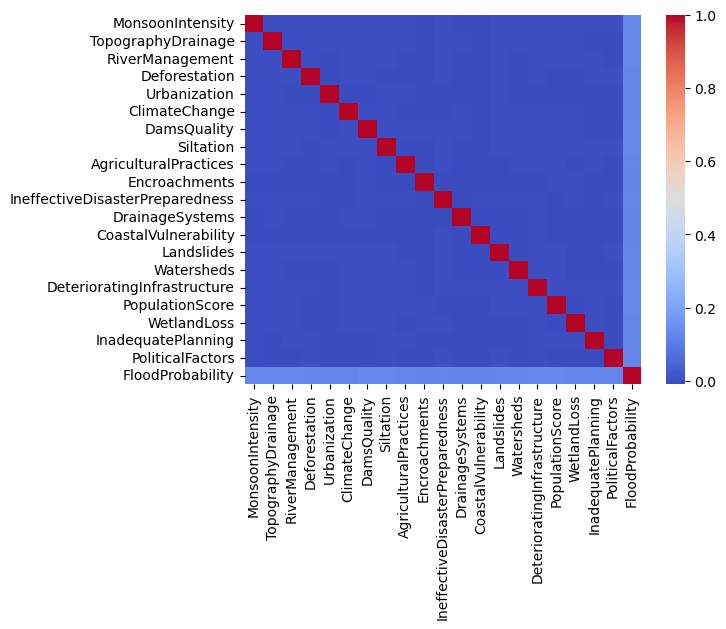

<Figure size 5000x1000 with 0 Axes>

In [15]:
#correlation with spearmane
corr = copy.corr(method='kendall')
sns.heatmap(corr, cmap='coolwarm')
fig = plt.figure(figsize=(50, 10))
plt.show()

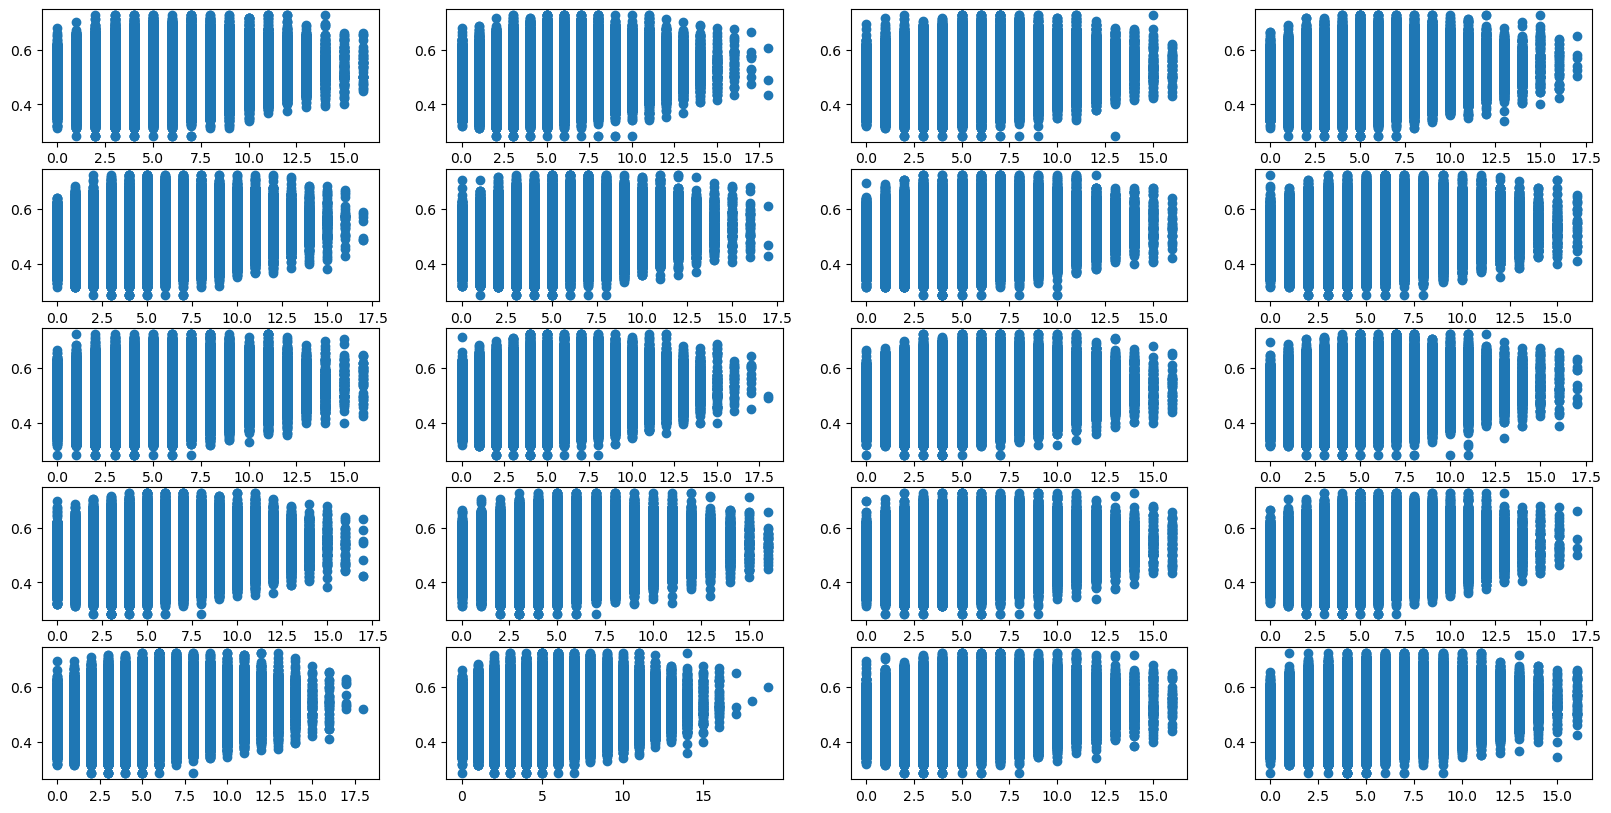

In [9]:
#scattter plots
x_vars = list(copy.drop(['id','FloodProbability'], axis=1).columns)
y = copy['FloodProbability']

#plot scatters
def plot_scatters(dataframe, X_var, y_var, num_rows, num_cols, fig_size):
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=fig_size)
    
    for i in range(num_rows):
        for j in range(num_cols):
            idx = i * num_cols + j
            x = X_var[idx]
            axs[i, j].scatter(dataframe[x], y_var)
            
    plt.show()

plot_scatters(copy, x_vars, y, 5, 4, (20, 10))

Log transform the data and see what happens

In [8]:
#make copy
log_df = copy.copy()
log_df = log_df.drop('id', axis=1)

#apply log transform need 1p because 0 is present

log_df = log_df.apply(np.log1p)


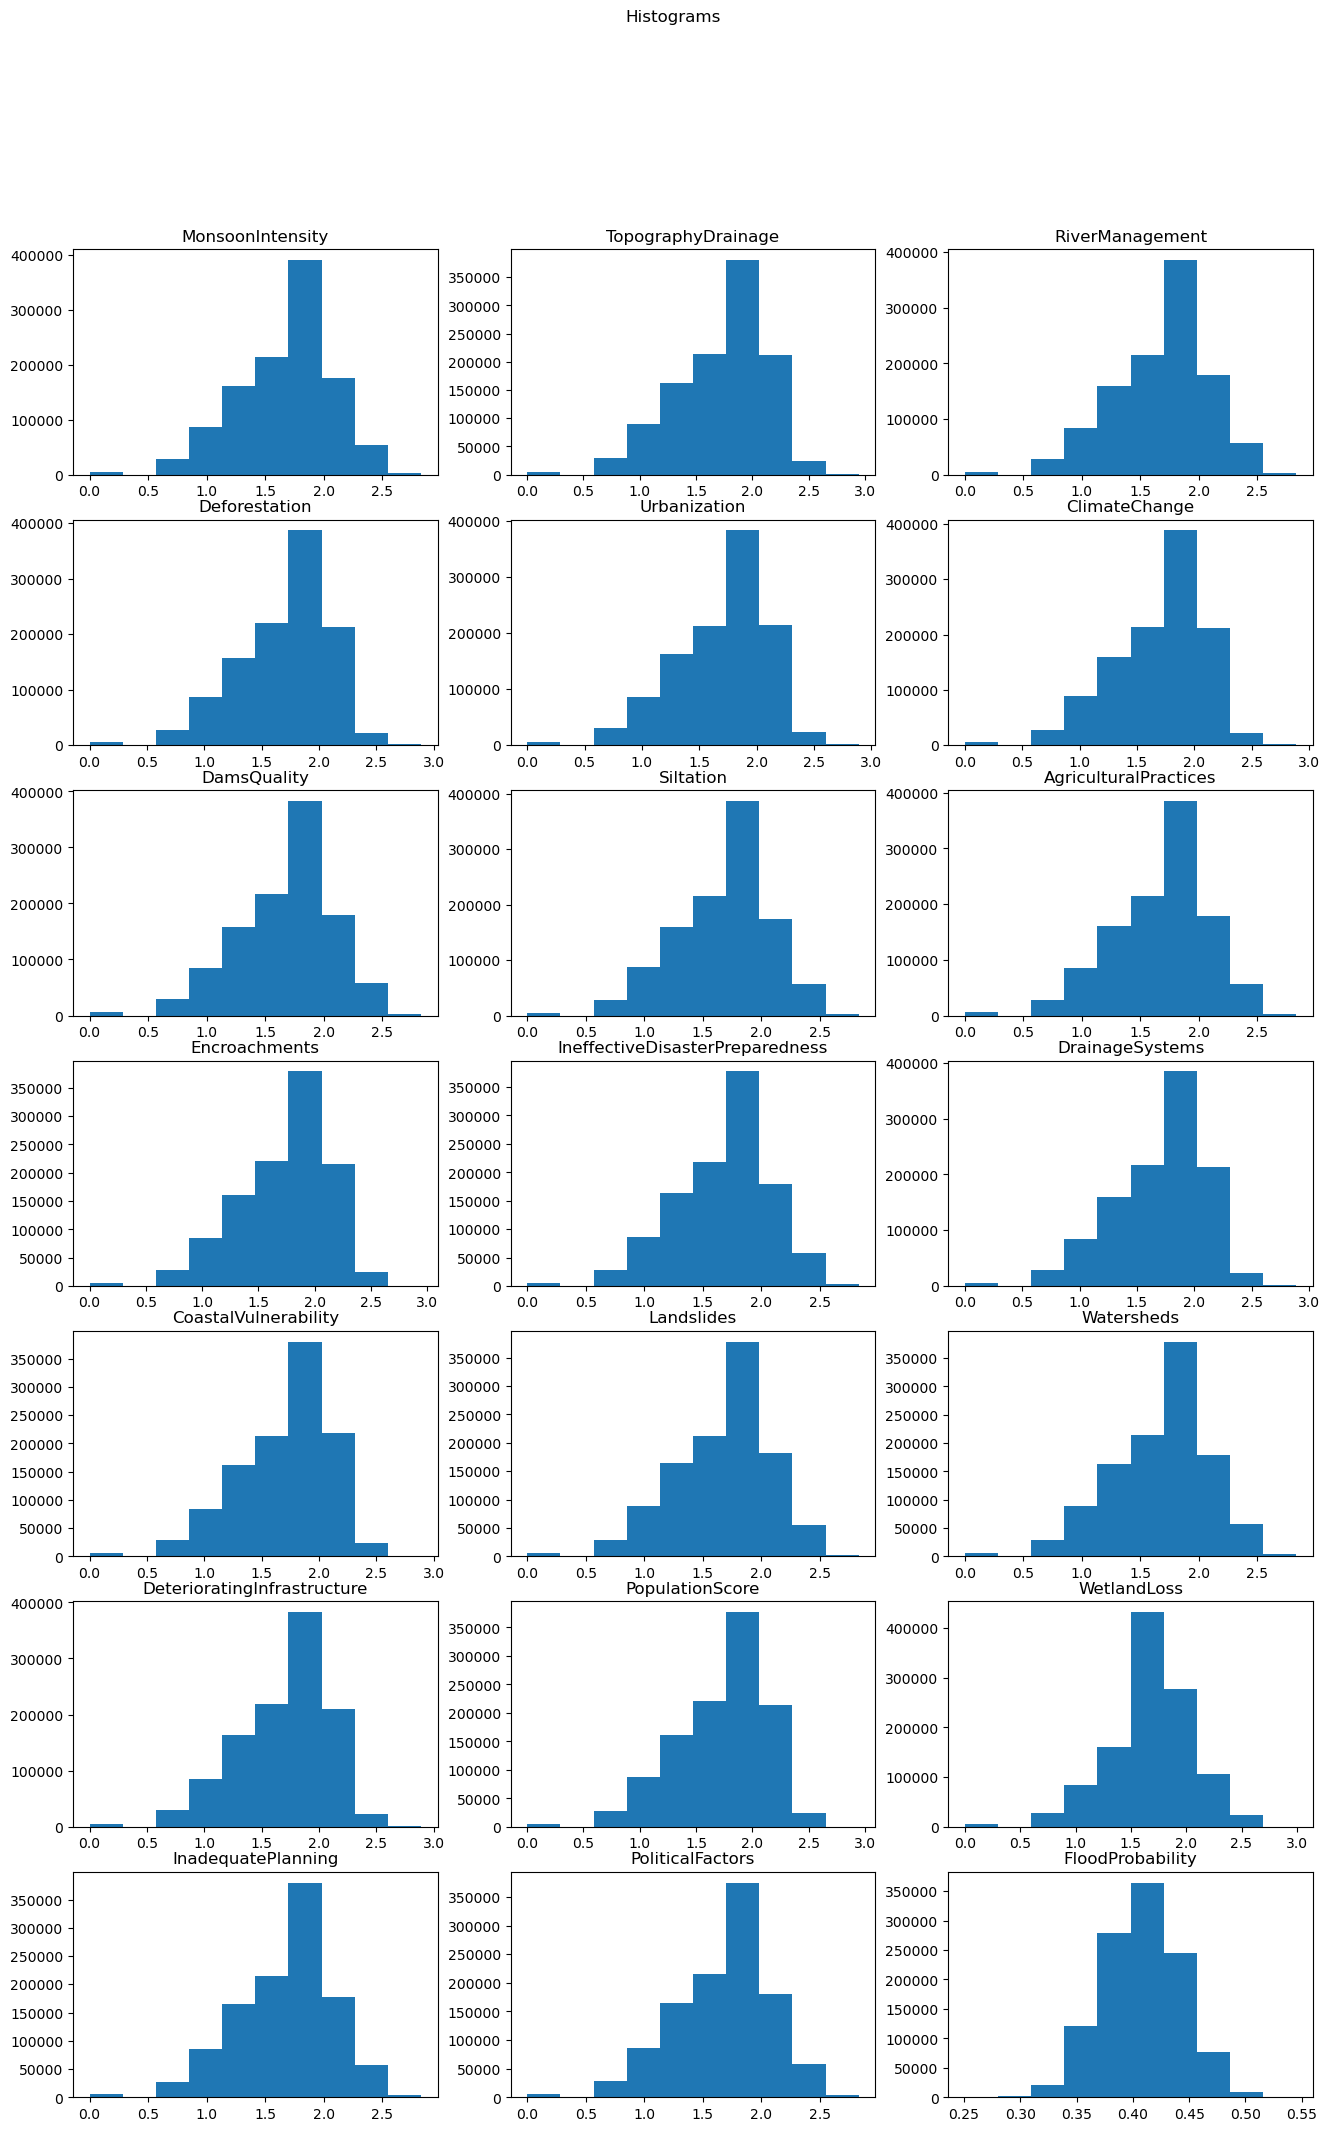

In [9]:
#histograms
plot_histograms(log_df, log_df.columns, 7, 3, (16, 24))

Run normality tests

In [11]:
jarque_bera(log_df, log_df.columns)

MonsoonIntensity:
    Test stat: 246881.79635288377
    p_value: 0.0
TopographyDrainage:
    Test stat: 216521.62157726983
    p_value: 0.0
RiverManagement:
    Test stat: 245086.9977378631
    p_value: 0.0
Deforestation:
    Test stat: 250046.321013161
    p_value: 0.0
Urbanization:
    Test stat: 226718.79034915855
    p_value: 0.0
ClimateChange:
    Test stat: 238750.43103727122
    p_value: 0.0
DamsQuality:
    Test stat: 258937.97847237735
    p_value: 0.0
Siltation:
    Test stat: 236032.39387391202
    p_value: 0.0
AgriculturalPractices:
    Test stat: 252625.18767088067
    p_value: 0.0
Encroachments:
    Test stat: 237872.2617640707
    p_value: 0.0
IneffectiveDisasterPreparedness:
    Test stat: 229041.86605364335
    p_value: 0.0
DrainageSystems:
    Test stat: 251767.4900117397
    p_value: 0.0
CoastalVulnerability:
    Test stat: 244325.84610473126
    p_value: 0.0
Landslides:
    Test stat: 226726.22951525875
    p_value: 0.0
Watersheds:
    Test stat: 219837.68375037806


In [12]:
daugstino(log_df, log_df.columns)

MonsoonIntensity:
    Test stat: 138686.1810154596
    p_value: 0.0
TopographyDrainage:
    Test stat: 127456.15523492097
    p_value: 0.0
RiverManagement:
    Test stat: 138315.7344969502
    p_value: 0.0
Deforestation:
    Test stat: 138973.98756018627
    p_value: 0.0
Urbanization:
    Test stat: 131871.841494305
    p_value: 0.0
ClimateChange:
    Test stat: 135707.9308532686
    p_value: 0.0
DamsQuality:
    Test stat: 142350.536460627
    p_value: 0.0
Siltation:
    Test stat: 134359.7373892854
    p_value: 0.0
AgriculturalPractices:
    Test stat: 141001.8548107139
    p_value: 0.0
Encroachments:
    Test stat: 133735.6812976255
    p_value: 0.0
IneffectiveDisasterPreparedness:
    Test stat: 131461.0273176743
    p_value: 0.0
DrainageSystems:
    Test stat: 140182.91661296893
    p_value: 0.0
CoastalVulnerability:
    Test stat: 137687.6815849801
    p_value: 0.0
Landslides:
    Test stat: 132181.55943652254
    p_value: 0.0
Watersheds:
    Test stat: 128667.49769775764
    p_v

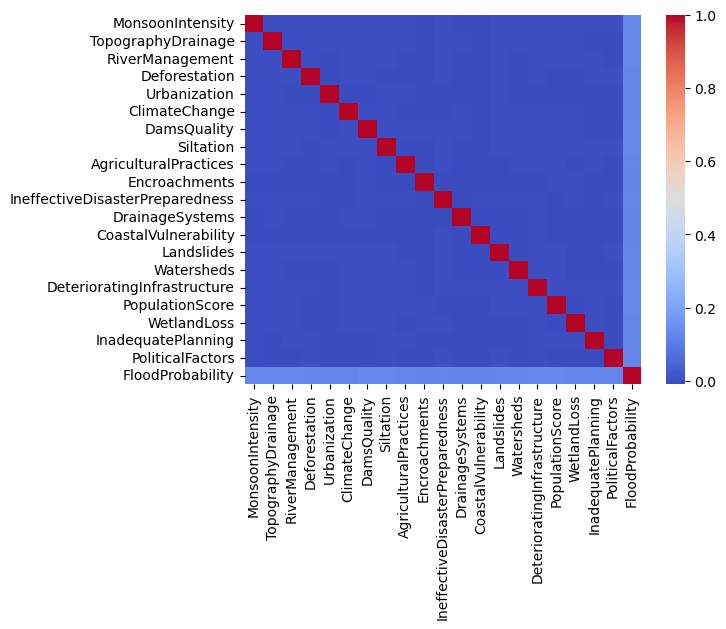

<Figure size 5000x1000 with 0 Axes>

In [13]:
corr = log_df.corr(method='kendall')
sns.heatmap(corr, cmap='coolwarm')
fig = plt.figure(figsize=(50, 10))
plt.show()

OLS

In [3]:
import statsmodels.api as sm

X = copy.drop('FloodProbability', axis=1)
y = copy['FloodProbability']

X_const = sm.add_constant(X)

model = sm.OLS(y, X_const)
results = model.fit()
results

: 

: 

## Feature engineers

GO WITH GROUPED DATA EASY AND PLAY AROUND WITH IT, MAY NEED A BIT OF FINE TUNING!!!!!!!!!!!!
:)))))))

In [12]:
copy.columns


Index(['id', 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')

The above features may be able to be grouped together:
- Climate
    - MonsoonIntensity, ClimateChange
- Environmental
    - TopographyDrainage, Deforestation, Urbanization, Siltation, AgriculturalPractices, CoastalVulnerability, Landslides, WaterSheds, WetLandLoss, Encroachments, PopulationScore
- Infrastructure
    - DamsQuality, DrainageSystems, DeterioratingInfrastructure, RiverManagement
- Institutions
    - IneffectiveDisasterPreparedness, InadequatePlanning, PoliticalFactors 

Probably take average to start



In [4]:
climate_df = copy.loc[:, ('MonsoonIntensity', 'ClimateChange')]
environmental_df = copy.loc[:, ('TopographyDrainage', 'Deforestation', 'Urbanization',
                         'Siltation', 'AgriculturalPractices', 'CoastalVulnerability',
                         'Landslides', 'Watersheds', 'WetlandLoss', 'Encroachments', 'PopulationScore')]
infrastructure_df = copy.loc[:, ('DamsQuality', 'DrainageSystems', 'DeterioratingInfrastructure', 'RiverManagement')]
institution_df = copy.loc[:, ('IneffectiveDisasterPreparedness', 'InadequatePlanning', 'PoliticalFactors')]


#get scores
climate_df['Climate Score'] = climate_df.mean(axis=1)
environmental_df['Environmental Score'] = environmental_df.mean(axis=1)
infrastructure_df['Infrastructure Score'] = infrastructure_df.mean(axis=1)
institution_df['Institution Score'] = institution_df.mean(axis=1)

climate_df

,MonsoonIntensity,ClimateChange,Climate Score
0,5,4,4.5
1,6,8,7.0
2,6,7,6.5
3,3,8,5.5
4,5,4,4.5
...,...,...,...
1117952,3,5,4.0
1117953,2,5,3.5
1117954,7,5,6.0
1117955,7,2,4.5


In [5]:
#make new df with grouped scores

grouped_df = pd.concat((climate_df['Climate Score'],
                        environmental_df['Environmental Score'],
                        infrastructure_df['Infrastructure Score'],
                        institution_df['Institution Score'],
                        copy['FloodProbability']),
                        axis='columns')
grouped_df

,Climate Score,Environmental Score,Infrastructure Score,Institution Score,FloodProbability
0,4.5,5.000000,4.50,4.000000,0.445
1,7.0,4.090909,4.75,5.333333,0.450
2,6.5,4.909091,5.00,4.000000,0.530
3,5.5,5.454545,4.00,5.666667,0.535
4,4.5,3.545455,2.75,4.333333,0.415
...,...,...,...,...,...
1117952,4.0,5.454545,4.50,4.333333,0.495
1117953,3.5,4.272727,7.00,4.666667,0.480
1117954,6.0,4.181818,7.25,3.666667,0.485
1117955,4.5,5.272727,4.00,5.333333,0.495


# EDA with Grouped data

In [6]:
#describe
grouped_df.describe()

,Climate Score,Environmental Score,Infrastructure Score,Institution Score,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,4.927772e+00,4.938532e+00,4.946000e+00,4.941610e+00,5.044803e-01
std,1.448711e+00,5.902119e-01,1.022019e+00,1.188960e+00,5.102610e-02
min,0.000000e+00,2.272727e+00,7.500000e-01,0.000000e+00,2.850000e-01
25%,4.000000e+00,4.545455e+00,4.250000e+00,4.000000e+00,4.700000e-01
50%,5.000000e+00,4.909091e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,6.000000e+00,5.363636e+00,5.500000e+00,5.666667e+00,5.400000e-01
max,1.350000e+01,8.000000e+00,1.075000e+01,1.166667e+01,7.250000e-01


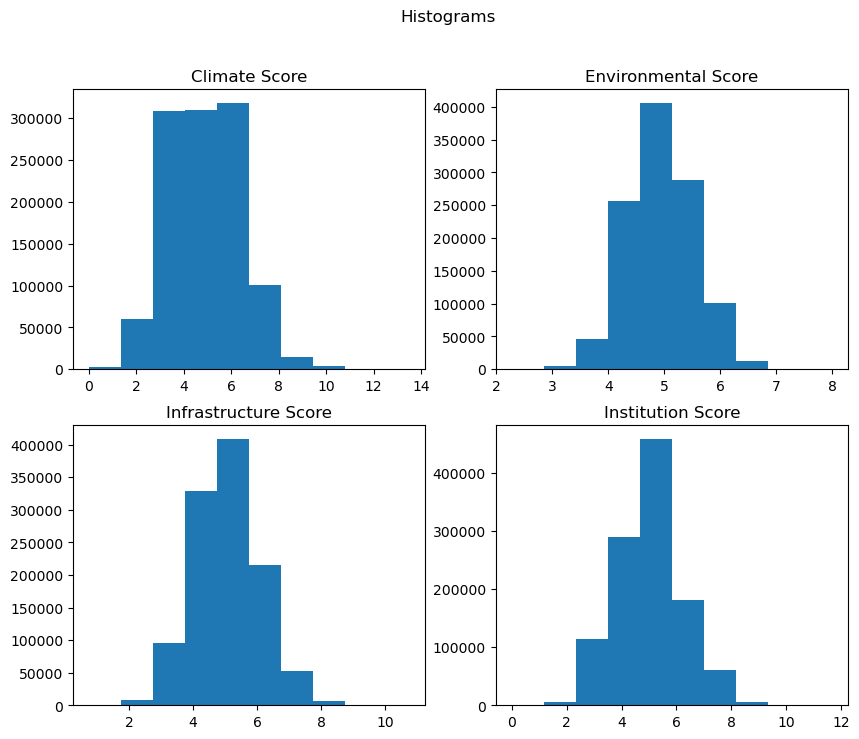

In [8]:
#plot histograms

plot_histograms(grouped_df, grouped_df.drop('FloodProbability', axis=1).columns, 2, 2, (10, 8))

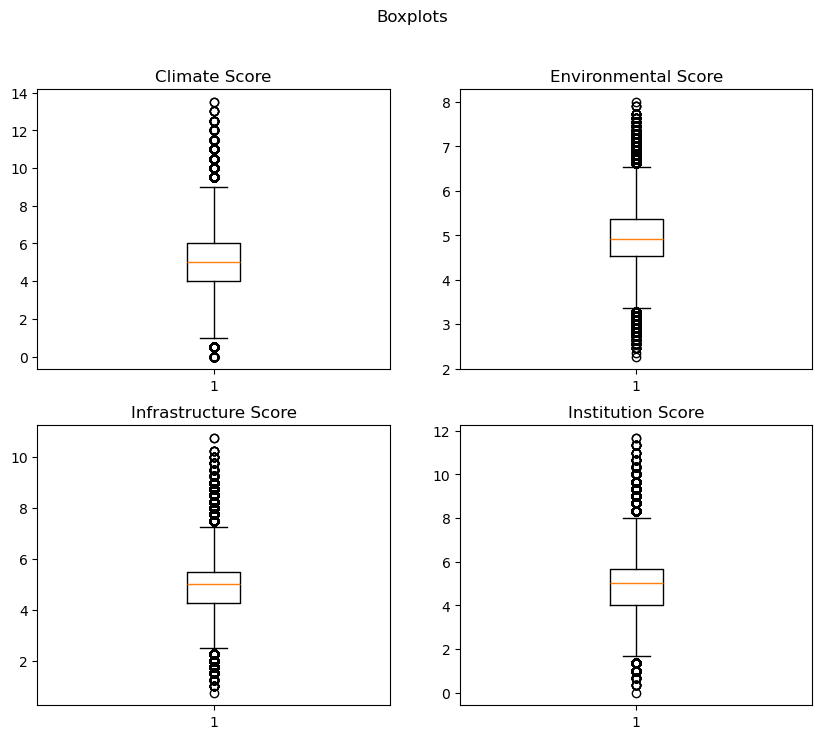

In [9]:
#plot boxplots
plot_boxplots(grouped_df, grouped_df.drop('FloodProbability', axis=1).columns, 2, 2, (10, 8))

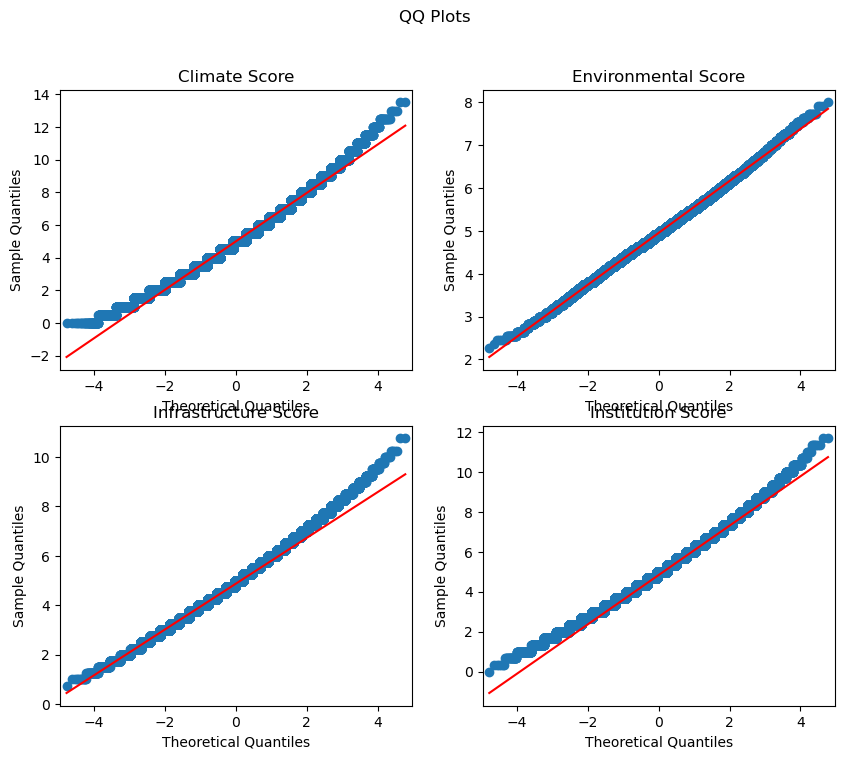

In [45]:
#make qq plots
make_qq(grouped_df, grouped_df.drop('FloodProbability', axis=1).columns, 2, 2, (10, 8))

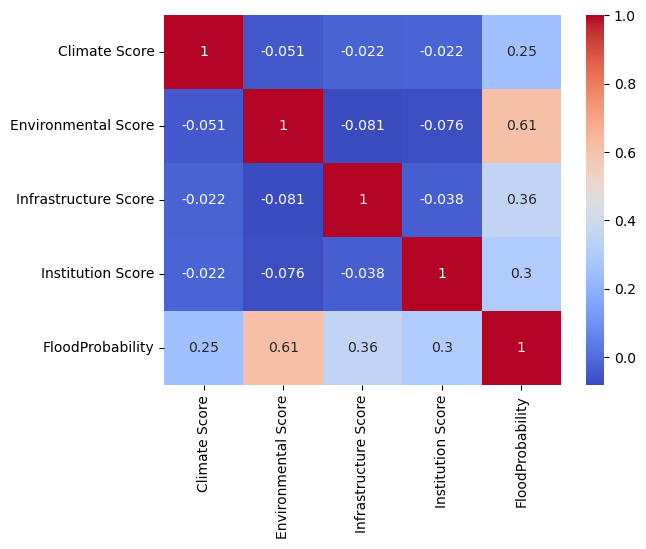

In [12]:
#heat map
corr = grouped_df.corr(method='spearman')
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()

apply some transformations - Log, Quantile, Yeo-Johnson

In [42]:
def make_copies(dataframe, feature, num_copies):
    new_df = pd.concat([dataframe[feature]] * num_copies, axis=1)
    return new_df



def change_col(dataframe):
    dataframe.columns = ['Original', 'Log Transformed', 'Quantile Transformed', 'Yeo-Johnson']
    return dataframe

#1d histograms and boxplots - may not need to use...
def histograms_1d(dataframe, features, title, num_rows, num_cols, fig_size):
    fig, axs = plt.subplots(nrows=num_rows, ncol=num_cols, figsize=fig_size)
    for i in range(num_rows):
        for j in range(num_cols):
            idx = i * num_cols + j
            feature = features[idx]
            axs[i, j].hist(dataframe[feature])
            axs[i, j].set_title(feature)

    plt.suptitle(title)
    plt.show()

In [43]:
climate = make_copies(grouped_df, 'Climate Score', 4)
climate = change_col(climate)

environmental = make_copies(grouped_df, 'Environmental Score', 4)
environmental = change_col(environmental)

infrastructure = make_copies(grouped_df, 'Infrastructure Score', 4)
infrastructure = change_col(infrastructure)

institution = make_copies(grouped_df, 'Institution Score', 4)
institution = change_col(institution)


In [47]:
from sklearn.preprocessing import QuantileTransformer, PowerTransformer

#function to log transform
def log_transform(dataframe, feature):
    dataframe[feature] = np.log1p(dataframe[feature])
    return dataframe[feature]

#function to powertransform
def yeo_johnson(dataframe, feature):
    pt = PowerTransformer(method='yeo-johnson')
    dataframe[feature] = pt.fit_transform(dataframe[feature].values.reshape(-1, 1))
    return dataframe[feature]

#function to quantile transform
def quantile_transformation(dataframe, feature):
    qt = QuantileTransformer(output_distribution='normal')
    dataframe[feature] = qt.fit_transform(dataframe[feature].values.reshape(-1, 1))
    return dataframe[feature]

### Binning

The data is ordinal which makes it tricky to model, I am going to bin the data into catagorical features:
- low risk = 0 - 4
- mild risk = 5 - 9
- high risk = 10 -14
- Very high = 15+
- Note some features end at 16 while others continue, but 16+ will be considered  very high risk

In [3]:
#binned df
binned_df = copy.copy()

#declare bins
my_bins = [0, 5, 10, 15, 20]
my_labels = ['Low', 'Mild', 'High', 'Very high'] #represents risk level


for feature in binned_df.columns:
    if feature == 'id':
        pass
    elif  feature == 'FloodProbability':
        pass
    else:
        binned_df[feature] = pd.cut(binned_df[feature], bins=my_bins, right=False, labels=my_labels)

binned_df

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,Mild,Mild,Mild,Mild,Mild,Low,Low,Low,Low,...,Mild,Low,Low,Mild,Low,Mild,Mild,Mild,Low,0.445
1,1,Mild,Mild,Low,Low,Mild,Mild,Low,Mild,Low,...,Mild,Low,Low,Low,Mild,Low,Low,Low,Low,0.450
2,2,Mild,Mild,Mild,Mild,Low,Mild,Low,Mild,Low,...,Mild,Low,Mild,Mild,Mild,Mild,Low,Low,Low,0.530
3,3,Low,Low,Mild,Mild,Low,Mild,Low,Mild,Mild,...,Low,Low,Mild,Low,Low,Mild,Mild,Mild,Mild,0.535
4,4,Mild,Low,Low,Mild,Low,Low,Low,Low,Low,...,Low,Low,Mild,Mild,Low,Low,Low,Low,Mild,0.415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117952,1117952,Low,Low,Low,High,Low,Mild,Mild,Mild,High,...,Mild,Mild,Mild,Low,Low,Low,Low,Mild,Low,0.495
1117953,1117953,Low,Low,Low,Low,Mild,Mild,Mild,Low,Low,...,Mild,Low,Low,Low,Mild,Low,Mild,Low,Mild,0.480
1117954,1117954,Mild,Low,Mild,Low,Mild,Mild,Mild,Low,Low,...,Mild,Mild,Mild,Mild,Mild,Mild,Mild,Low,Low,0.485
1117955,1117955,Mild,Low,Low,Mild,Mild,Low,Low,Low,Mild,...,Mild,Mild,Mild,Low,Low,Mild,Mild,Mild,Low,0.495


# Modelling w/ Numeric data

In [20]:
#import libraries
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

from sklearn.metrics import r2_score

In [15]:
#declare data
X = copy.drop('FloodProbability', axis=1)
y = copy['FloodProbability']

#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

## Base Model

StandardScaler + Linear Regression

In [26]:
#pipeline
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

#fit
pipeline.fit(X_train, y_train)

#predictions
train_pred = pipeline.predict(X_train)
test_pred = pipeline.predict(X_test)

#results
train_score = r2_score(y_train, train_pred)
test_score = r2_score(y_test, test_pred)

#print results
print(f"Train accuracy: {train_score:.5f}")
print(f"Test accuracy: {test_score:.5f}")

Train accuracy: 0.84506
Test accuracy: 0.84468


In [27]:
#get scores
scores = pipeline.named_steps['model'].coef_
scores

array([0.0115613 , 0.01179326, 0.01171316, 0.01165323, 0.01177047,
       0.01164972, 0.01178978, 0.01165423, 0.0116563 , 0.01178646,
       0.01173999, 0.01167172, 0.01186623, 0.01170434, 0.01174502,
       0.01157999, 0.01179597, 0.01167529, 0.01167066, 0.01179667])

add RFE

In [21]:
#pipeline
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('RFE', RFE(estimator=LinearRegression())),
    ('model', LinearRegression())
])

#fit
pipeline.fit(X_train, y_train)

#predictions
train_pred = pipeline.predict(X_train)
test_pred = pipeline.predict(X_test)

#results
train_score = r2_score(y_train, train_pred)
test_score = r2_score(y_test, test_pred)

#print results
print(f"Train accuracy: {train_score:.5f}")
print(f"Test accuracy: {test_score:.5f}")

Train accuracy: 0.37752
Test accuracy: 0.37913


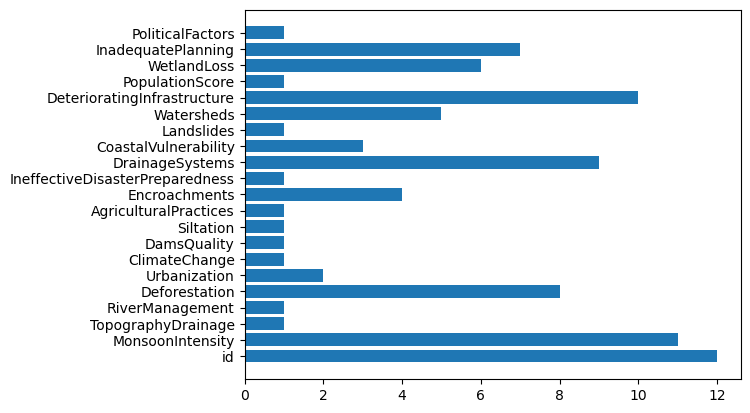

In [28]:
names = list(X_train.columns)
ranks = pipeline.named_steps['RFE'].ranking_

#plt
plt.barh(names, ranks, )
plt.show()

In [32]:
#pipeline
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('RFE', RFE(estimator=LinearRegression(), n_features_to_select=21)),
    ('model', LinearRegression())
])

#fit
pipeline.fit(X_train, y_train)

#predictions
train_pred = pipeline.predict(X_train)
test_pred = pipeline.predict(X_test)

#results
train_score = r2_score(y_train, train_pred)
test_score = r2_score(y_test, test_pred)

#print results
print(f"Train accuracy: {train_score:.5f}")
print(f"Test accuracy: {test_score:.5f}")

Train accuracy: 0.84494
Test accuracy: 0.84496


Base + log transform

In [18]:
#pipeline
pipeline = Pipeline(steps=[
    ('log_transform',FunctionTransformer(func=np.log1p)),
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

#fit
pipeline.fit(X_train, y_train)

#predictions
train_pred = pipeline.predict(X_train)
test_pred = pipeline.predict(X_test)

#results
train_score = r2_score(y_train, train_pred)
test_score = r2_score(y_test, test_pred)

#print results
print(f"Train accuracy: {train_score:.5f}")
print(f"Test accuracy: {test_score:.5f}")

Train accuracy: 0.75682
Test accuracy: 0.75749


In [19]:
pipeline.named_steps['model'].coef_

array([5.54401387e-06, 1.05337666e-02, 1.06326412e-02, 1.05586691e-02,
       1.05924230e-02, 1.05331121e-02, 1.04939405e-02, 1.05739667e-02,
       1.05083349e-02, 1.04835027e-02, 1.05281445e-02, 1.04906517e-02,
       1.05245413e-02, 1.05790484e-02, 1.05400580e-02, 1.04544281e-02,
       1.05466927e-02, 1.05582814e-02, 1.05073675e-02, 1.04496124e-02,
       1.05082910e-02])

In [64]:
#pipeline
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('quantile transformer', QuantileTransformer(output_distribution='normal')),
    ('model', LinearRegression())
])

#fit
pipeline.fit(X_train, y_train)

#predictions
train_pred = pipeline.predict(X_train)
test_pred = pipeline.predict(X_test)

#results
train_score = r2_score(y_train, train_pred)
test_score = r2_score(y_test, test_pred)

#print results
print(f"Train accuracy: {train_score:.5f}")
print(f"Test accuracy: {test_score:.5f}")

Train accuracy: 0.84267
Test accuracy: 0.84230


Given the data is more ordinal, perhaps a RandomForest might be better. 

## Random Forest

Standardscaler + RandomForest

In [28]:
from sklearn.ensemble import RandomForestRegressor

pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor())
])

pipeline.fit(X_train, y_train)

#predictions
train_pred = pipeline.predict(X_train)
test_pred = pipeline.predict(X_test)

#results
train_score = r2_score(y_train, train_pred)
test_score = r2_score(y_test, test_pred)

#print results
print(f"Train accuracy: {train_score:.5f}")
print(f"Test accuracy: {test_score:.5f}")

: 

: 

# Modelling with Grouped data

In [54]:
#import libraries
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline

from sklearn.metrics import r2_score

In [55]:
#declare data
X = grouped_df.drop('FloodProbability', axis=1)
y = grouped_df['FloodProbability']

#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [23]:
#pipeline
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

#fit
pipeline.fit(X_train, y_train)

#predictions
train_pred = pipeline.predict(X_train)
test_pred = pipeline.predict(X_test)

#results
train_score = r2_score(y_train, train_pred)
test_score = r2_score(y_test, test_pred)

#print results
print(f"Train accuracy: {train_score:.5f}")
print(f"Test accuracy: {test_score:.5f}")

Train accuracy: 0.84479
Test accuracy: 0.84528


In [20]:
pipeline.named_steps['model'].coef_

array([0.01633017, 0.03668949, 0.0230716 , 0.02005868])

add quantile transformation

In [60]:
#pipeline
pipeline = Pipeline(steps=[
    ('quantile_transformer', QuantileTransformer(output_distribution='normal')),
    #('scaler', StandardScaler()),
    ('model', LinearRegression())
])

#fit
pipeline.fit(X_train, y_train)

#predictions
train_pred = pipeline.predict(X_train)
test_pred = pipeline.predict(X_test)

#results
train_score = r2_score(y_train, train_pred)
test_score = r2_score(y_test, test_pred)

#print results
print(f"Train accuracy: {train_score:.5f}")
print(f"Test accuracy: {test_score:.5f}")

Train accuracy: 0.84261
Test accuracy: 0.84224


In [57]:
#pipeline
pipeline = Pipeline(steps=[
    ('yeo-johnson', PowerTransformer(method='yeo-johnson')),
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

#fit
pipeline.fit(X_train, y_train)

#predictions
train_pred = pipeline.predict(X_train)
test_pred = pipeline.predict(X_test)

#results
train_score = r2_score(y_train, train_pred)
test_score = r2_score(y_test, test_pred)

#print results
print(f"Train accuracy: {train_score:.5f}")
print(f"Test accuracy: {test_score:.5f}")

Train accuracy: 0.84340
Test accuracy: 0.84300


In [58]:
#pipeline
pipeline = Pipeline(steps=[
    ('log', FunctionTransformer(func=np.log1p)),
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

#fit
pipeline.fit(X_train, y_train)

#predictions
train_pred = pipeline.predict(X_train)
test_pred = pipeline.predict(X_test)

#results
train_score = r2_score(y_train, train_pred)
test_score = r2_score(y_test, test_pred)

#print results
print(f"Train accuracy: {train_score:.5f}")
print(f"Test accuracy: {test_score:.5f}")

Train accuracy: 0.82919
Test accuracy: 0.82891


In [59]:
pipeline.named_steps['model'].coef_

array([0.01597875, 0.03629988, 0.02273223, 0.0197116 ])

In [24]:
#pipeline
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('RFE', RFE(LinearRegression())),
    ('model', LinearRegression())
])

#fit
pipeline.fit(X_train, y_train)

#predictions
train_pred = pipeline.predict(X_train)
test_pred = pipeline.predict(X_test)

#results
train_score = r2_score(y_train, train_pred)
test_score = r2_score(y_test, test_pred)

#print results
print(f"Train accuracy: {train_score:.5f}")
print(f"Test accuracy: {test_score:.5f}")

Train accuracy: 0.59628
Test accuracy: 0.59532


In [25]:
pipeline.named_steps['RFE'].ranking_

array([3, 1, 1, 2])

In [28]:
#pipeline
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('RFE', RFE(LinearRegression(), n_features_to_select=4)),
    ('model', LinearRegression())
])

#fit
pipeline.fit(X_train, y_train)

#predictions
train_pred = pipeline.predict(X_train)
test_pred = pipeline.predict(X_test)

#results
train_score = r2_score(y_train, train_pred)
test_score = r2_score(y_test, test_pred)

#print results
print(f"Train accuracy: {train_score:.5f}")
print(f"Test accuracy: {test_score:.5f}")

Train accuracy: 0.84479
Test accuracy: 0.84528


In [13]:
#pipeline
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('model', Ridge())
])

#fit
pipeline.fit(X_train, y_train)

#predictions
train_pred = pipeline.predict(X_train)
test_pred = pipeline.predict(X_test)

#results
train_score = r2_score(y_train, train_pred)
test_score = r2_score(y_test, test_pred)

#print results
print(f"Train accuracy: {train_score:.5f}")
print(f"Test accuracy: {test_score:.5f}")

Train accuracy: 0.84479
Test accuracy: 0.84528


array([0.01633015, 0.03668944, 0.02307156, 0.02005865])

Huber Regressor

In [21]:
from sklearn.linear_model import HuberRegressor

#pipeline
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('model', HuberRegressor())
])

#fit
pipeline.fit(X_train, y_train)

#predictions
train_pred = pipeline.predict(X_train)
test_pred = pipeline.predict(X_test)

#results
train_score = r2_score(y_train, train_pred)
test_score = r2_score(y_test, test_pred)

#print results
print(f"Train accuracy: {train_score:.5f}")
print(f"Test accuracy: {test_score:.5f}")

Train accuracy: 0.84110
Test accuracy: 0.84181


XGBRegressor

In [29]:
from xgboost import XGBRegressor

#pipeline
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('model', XGBRegressor())
])

#fit
pipeline.fit(X_train, y_train)

#predictions
train_pred = pipeline.predict(X_train)
test_pred = pipeline.predict(X_test)

#results
train_score = r2_score(y_train, train_pred)
test_score = r2_score(y_test, test_pred)

#print results
print(f"Train accuracy: {train_score:.5f}")
print(f"Test accuracy: {test_score:.5f}")

Train accuracy: 0.85139
Test accuracy: 0.84964


In [33]:
pipeline.named_steps['model'].get_score(importance_type='gain')

AttributeError: 'XGBRegressor' object has no attribute 'get_score'

# Modelling with Binned data

In [6]:
#import libraries
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score

In [5]:
# decalre and split data

#declare var
X = binned_df.drop(['id', 'FloodProbability'], axis=1)
y = binned_df['FloodProbability']

#split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.3)


In [28]:
#build pipeline
pipeline = Pipeline(steps=[
    ('encode', OneHotEncoder()),
    ('model', LinearRegression())
])

pipeline.fit(X_train, y_train)

#predictions
train_pred = pipeline.predict(X_train)
test_pred = pipeline.predict(X_test)

#results
train_score = r2_score(y_train, train_pred)
test_score = r2_score(y_test, test_pred)

#print results
print(f"Train accuracy: {train_score:.5f}")
print(f"Test accuracy: {test_score:.5f}")

Train accuracy: 0.57216
Test accuracy: 0.57133


In [41]:
#build pipeline
pipeline = Pipeline(steps=[
    ('encode', OneHotEncoder()),
    ('model', Ridge())
])

pipeline.fit(X_train, y_train)

#predictions
train_pred = pipeline.predict(X_train)
test_pred = pipeline.predict(X_test)

#results
train_score = r2_score(y_train, train_pred)
test_score = r2_score(y_test, test_pred)

#print results
print(f"Train accuracy: {train_score:.5f}")
print(f"Test accuracy: {test_score:.5f}")

ValueError: Found unknown categories [0.75] in column 2 during transform

In [8]:
#build pipeline
pipeline = Pipeline(steps=[
    ('encode', OneHotEncoder()),
    ('decomposition', TruncatedSVD()),
    ('model', LinearRegression())
])

pipeline.fit(X_train, y_train)

#predictions
train_pred = pipeline.predict(X_train)
test_pred = pipeline.predict(X_test)

#results
train_score = r2_score(y_train, train_pred)
test_score = r2_score(y_test, test_pred)

#print results
print(f"Train accuracy: {train_score:.5f}")
print(f"Test accuracy: {test_score:.5f}")

Train accuracy: 0.01767
Test accuracy: 0.01715


In [6]:
#build pipeline
pipeline = Pipeline(steps=[
    ('encode', OneHotEncoder()),
    ('model', Ridge())
])

pipeline.fit(X_train, y_train)

#predictions
train_pred = pipeline.predict(X_train)
test_pred = pipeline.predict(X_test)

#results
train_score = r2_score(y_train, train_pred)
test_score = r2_score(y_test, test_pred)

#print results
print(f"Train accuracy: {train_score:.5f}")
print(f"Test accuracy: {test_score:.5f}")

Train accuracy: 0.57190
Test accuracy: 0.57191


In [7]:
#build pipeline
pipeline = Pipeline(steps=[
    ('encode', OneHotEncoder()),
    ('model', Lasso())
])

pipeline.fit(X_train, y_train)

#predictions
train_pred = pipeline.predict(X_train)
test_pred = pipeline.predict(X_test)

#results
train_score = r2_score(y_train, train_pred)
test_score = r2_score(y_test, test_pred)

#print results
print(f"Train accuracy: {train_score:.5f}")
print(f"Test accuracy: {test_score:.5f}")

Train accuracy: 0.00000
Test accuracy: -0.00000


Lasso didn't work..durp

Binning may not be the way to go....